In [1]:
def max_min(list):

    if list.size == 0:
        return None
    maximo = max(list)
    minimo = min(list) 
    return [minimo,maximo]



In [2]:
%%file max_min.c

#include <stdio.h>
#include <stdlib.h>

float* method_max_min(float *list) {
    float *result = (float*)malloc(2 * sizeof(float));
    int size = sizeof(list) / sizeof(list[0]);

    result[0] = list[0]; // Mínimo
    result[1] = list[0];

    for (int i = 1; i < size; i++) {
        if (list[i] > result[1]) {
            result[1] = list[i]; // Nuevo máximo
        }
        if (list[i] < result[0]) {
            result[0] = list[i]; // Nuevo mínimo
        }
    }

    return  result;
}

Overwriting max_min.c


In [3]:
! gcc -shared -fPIC max_min.c -o max_min.so -lm

In [4]:
import ctypes
import numpy as np
import time
import statistics

lib = ctypes.CDLL('./max_min.so')
lib.method_max_min.argtypes = [np.ctypeslib.ndpointer(dtype = np.float32)]


iter = 50 
list_time_c = []
list_time_py = []
for i in range(iter):
    N=1024
    max_val, min_val = 1, 100
    range_size = (max_val - min_val)  
    lista =  np.random.rand(N).astype(np.float32) * range_size + min_val

    star_c = time.perf_counter()
    result_c = lib.method_max_min(lista)
    end_c = time.perf_counter()
    list_time_c.append(end_c - star_c)

    start_py = time.perf_counter()
    result_py = max_min(lista)
    end_py = time.perf_counter()
    list_time_py.append(end_py - start_py)

print("C time: ", statistics.mean(list_time_c))
print("Python time: ", statistics.mean(list_time_py))
    # print(result)


C time:  5.984001909382641e-06
Python time:  8.58879991574213e-05


In [5]:
import ctypes
import numpy as np
import time
import statistics

lib = ctypes.CDLL('./max_min.so')
lib.method_max_min.argtypes = [np.ctypeslib.ndpointer(dtype = np.float32)]

list_N =[512,1024,2048,4096,8192]

list_time_N_c = []
list_time_N_py = []
for N in list_N:
    iter = 50 
    list_time_c = []
    list_time_py = []
    for i in range(iter):
        # N=1024
        max_val, min_val = 1, 100
        range_size = (max_val - min_val)  
        lista =  np.random.rand(N).astype(np.float32) * range_size + min_val

        star_c = time.perf_counter()
        result_c = lib.method_max_min(lista)
        end_c = time.perf_counter()
        list_time_c.append(end_c - star_c)

        start_py = time.perf_counter()
        result_py = max_min(lista)
        end_py = time.perf_counter()
        list_time_py.append(end_py - start_py)
    list_time_N_c.append(statistics.mean(list_time_c))
    list_time_N_py.append(statistics.mean(list_time_py))


print(f'tiempo en c : {list_time_N_c}')
print(f'tiempo en py : {list_time_N_py}')



tiempo en c : [8.643998298794032e-06, 1.0110003058798611e-05, 7.505998946726322e-06, 1.4622000162489712e-05, 1.5441998839378358e-05]


TypeError: unsupported operand type(s) for /: 'list' and 'list'

<function matplotlib.pyplot.show(close=None, block=None)>

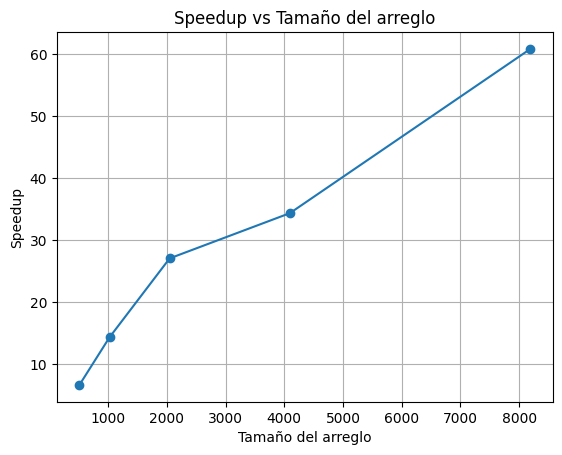

In [ ]:
import matplotlib.pyplot as plt
list_speedUp = []
for i in range(len(list_N)):
    speed_up = list_time_N_py[i]/list_time_N_c[i]
    list_speedUp.append(speed_up)


plt.plot(list_N,list_speedUp,marker='o', linestyle='-')
plt.title('Speedup vs Tamaño del arreglo')
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Speedup')
plt.grid()
plt.show
 